## __Exploratory Data Analysis__

### __Import Packages__

In [33]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

In [4]:
# Load cleaned data
df = pd.read_csv('./data/df_cleaned.csv')

# Load dictionaries from dict_file.txt and replace string keys with int values
with open('./data/dict_file.txt', 'r') as file:
    for line in file:
        split = line.split(' ', maxsplit=2)
        globals()[split[0]] = eval(split[2])
        globals()[split[0]] = {int(k):v for k, v in globals()[split[0]].items()}

# Test that we have the dictionaries loaded correctly
print(mothers_occupation)

{0: 'Student', 1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers', 2: 'Specialists in Intellectual and Scientific Activities', 3: 'Intermediate Level Technicians and Professions', 4: 'Administrative staff', 5: 'Personal Services, Security and Safety Workers and Sellers', 6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 7: 'Skilled Workers in Industry, Construction and Craftsmen', 8: 'Installation and Machine Operators and Assembly Workers', 9: 'Unskilled Workers', 10: 'Armed Forces Professions', 90: 'Other Situation', 99: '(blank)', 122: 'Health professionals', 123: 'teachers', 125: 'Specialists in information and communication technologies (ICT)', 131: 'Intermediate level science and engineering technicians and professions', 132: 'Technicians and professionals, of intermediate level of health', 134: 'Intermediate level technicians from legal, social, sports, cultural and similar services', 141: 'Offic

### __Explore Data__

In [5]:
print('Total number of students: ', df.shape[0])
print('Most international students are: ', nationality[df.Nationality.value_counts().index[1]])
print('Admission grade - min {:.2f} : average {:.2f} : max {:.2f} '.format(df['Admission grade'].min(), df['Admission grade'].mean(), df['Admission grade'].max()))

Total number of students:  4424
Most international students are:  Brazilian
Admission grade - min 95.00 : average 126.98 : max 190.00 


Looks like the university has a pretty wide range of admission grades. 

In [6]:
df['Admission grade'].groupby(df['Target']).mean()

Target
Dropout     124.961365
Enrolled    125.534257
Graduate    128.794432
Name: Admission grade, dtype: float64

Noticeable jump from dropout admission grades to graduate admission grades.

In [7]:
df['Admission grade'].groupby(df['Target']).std()

Target
Dropout     15.125159
Enrolled    13.792559
Graduate    14.071440
Name: Admission grade, dtype: float64

In [8]:
df.Gender.groupby(df.Target).value_counts()

Target    Gender
Dropout   0          720
          1          701
Enrolled  0          487
          1          307
Graduate  0         1661
          1          548
Name: count, dtype: int64

Interestingly, the genders of dropout students are fairly equal while the graudate gender ratio is heavily skewed towards female students (3 times more).

In [9]:
df['Tuition fees up to date'].groupby(df['Target']).value_counts()

Target    Tuition fees up to date
Dropout   1                           964
          0                           457
Enrolled  1                           752
          0                            42
Graduate  1                          2180
          0                            29
Name: count, dtype: int64

Whether tuition fees are up to date seems to have a large impact on student's academic performance.

In [10]:
df['Educational special needs'].groupby(df['Target']).value_counts()

Target    Educational special needs
Dropout   0                            1404
          1                              17
Enrolled  0                             783
          1                              11
Graduate  0                            2186
          1                              23
Name: count, dtype: int64

Educational special needs has a similarly large impact.

In [11]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,54.954087,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,6.165950,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,54.954087,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,0.000759,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,6.165950,Graduate


### __Inferential Statistics__

#### __t-Test__

In [1]:
# t-Test to see if admission grades are related to gender
# First check that admission grades are normally distributed

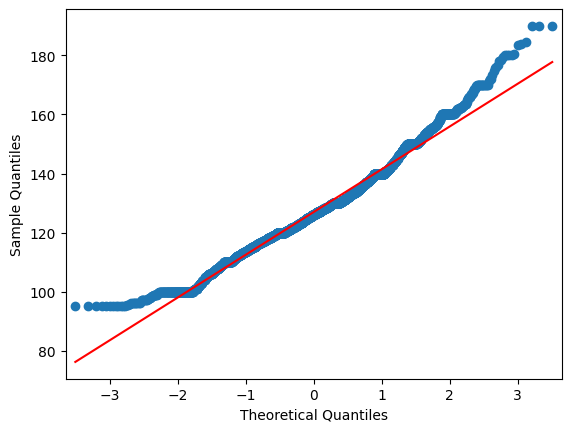

In [32]:
sm.qqplot(df['Admission grade'], line='s')
plt.show()

This qq plot shows that admission grades are roughly normally distributed, so we can continue with out t-Test analysis.

In [35]:
t_test_adgr_gend = scipy.stats.ttest_ind(df['Admission grade'][df.Gender == 1], df['Admission grade'][df.Gender == 0], equal_var=True)
print(t_test_adgr_gend)

TtestResult(statistic=0.5529373750543329, pvalue=0.5803342439414844, df=4422.0)


We get a large p-value, indicating there's no statistically significant difference between the two genders in relation to admission grades.

$\chi^{2}$ Test

In [41]:
# Chi square test, see if target (graduate / dropout) related to age at enrollment. First create contingency table
cont_tab_targ_sh = pd.crosstab(df.Target, df['Scholarship holder'])

In [42]:
# Then perform chi2 on contingency table
scipy.stats.chi2_contingency(cont_tab_targ_sh)

Chi2ContingencyResult(statistic=409.94305544699375, pvalue=9.593930375514133e-90, dof=2, expected_freq=array([[1067.99841772,  353.00158228],
       [ 596.75632911,  197.24367089],
       [1660.24525316,  548.75474684]]))

Our pvalue here is 1e-90, indicating a vary strong correlation between academic status at the end of the semester and scholarship holder and that they are not independent of each other.

#### __Correlation Test__

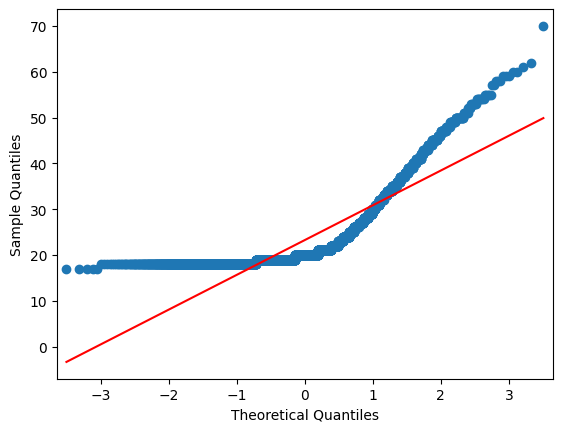

In [46]:
# Correlation test between age at enrollment and admission grade. First checking for normal distributions. Know already that admission grade is roughly normally distributed.
sm.qqplot(df['Age at enrollment'], line='s')
plt.show()

Age at enrollment is not normally distributed (which we would expect, as most people in college are college aged and there are few older students). Because it's not normally distribued we'll use a Spearman correlation.

In [51]:
corr_age_adgrade = scipy.stats.spearmanr(df['Age at enrollment'], df['Admission grade'])
print(corr_age_adgrade)

SignificanceResult(statistic=-0.10175728905459384, pvalue=1.1697381192973342e-11)


We see a very small pvalue, indicating a statistically significant negative correlation (statistic is less than 0), although the correlation is weak because our statistic is quite close to 0.

#### __Scale Data__

In [11]:
# df_feat_to_scale = df['Previous qualification (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployement rate', 'Inflation rate', 'GDP']
df_feat_to_scale = df.drop(columns=['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Nationality', 'Mother\'s qualification', "Father\'s qualification", 'Target'])
df_targ = df.Target
df_scale = scale(df_feat_to_scale)
df_columns = df_feat_to_scale.columns

df_feat_scaled = pd.DataFrame(df_scale, columns=df_columns)

In [12]:
df_feat_scaled.head()

,Previous qualification (grade),Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.804841,-0.225661,-0.080456,0.022229,0.907512,-0.107993,-0.358167,0.368135,1.357640,-0.574914,...,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,-0.267754
1,2.076819,-0.301375,-0.317984,1.071926,0.907512,-0.107993,-0.358167,-2.716392,1.357640,-0.574914,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,-0.322741
2,-0.804841,-0.074233,-0.080456,-0.150419,0.907512,-0.107993,-0.358167,-2.716392,1.357640,-0.574914,...,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,-0.267754
3,-0.804841,-0.225661,-0.317984,-0.509526,0.907512,-0.107993,-0.358167,0.368135,-0.736572,-0.574914,...,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-0.329690
4,-2.473171,-0.074233,-0.080456,1.002867,-1.101914,-0.107993,-0.358167,0.368135,-0.736572,-0.574914,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,-0.322741


In [13]:
df_feat_scaled.mean()

Previous qualification (grade)                   -3.589654e-16
Mother's occupation                              -1.847026e-17
Father's occupation                               9.235128e-18
Admission grade                                  -9.708930e-16
Displaced                                        -7.388103e-17
Educational special needs                         2.569775e-17
Debtor                                           -2.650080e-17
Tuition fees up to date                          -1.317010e-16
Gender                                            1.027910e-16
Scholarship holder                                9.636656e-18
Age at enrollment                                -1.027910e-16
International                                     4.175884e-17
Curricular units 1st sem (credited)               3.212219e-17
Curricular units 1st sem (enrolled)               3.533440e-17
Curricular units 1st sem (evaluations)            9.636656e-17
Curricular units 1st sem (approved)               3.051

In [14]:
df_feat_scaled.std(ddof=0)

Previous qualification (grade)                    1.0
Mother's occupation                               1.0
Father's occupation                               1.0
Admission grade                                   1.0
Displaced                                         1.0
Educational special needs                         1.0
Debtor                                            1.0
Tuition fees up to date                           1.0
Gender                                            1.0
Scholarship holder                                1.0
Age at enrollment                                 1.0
International                                     1.0
Curricular units 1st sem (credited)               1.0
Curricular units 1st sem (enrolled)               1.0
Curricular units 1st sem (evaluations)            1.0
Curricular units 1st sem (approved)               1.0
Curricular units 1st sem (grade)                  1.0
Curricular units 1st sem (without evaluations)    1.0
Curricular units 2nd sem (cr

In [15]:
df_pca = PCA().fit(df_feat_scaled)

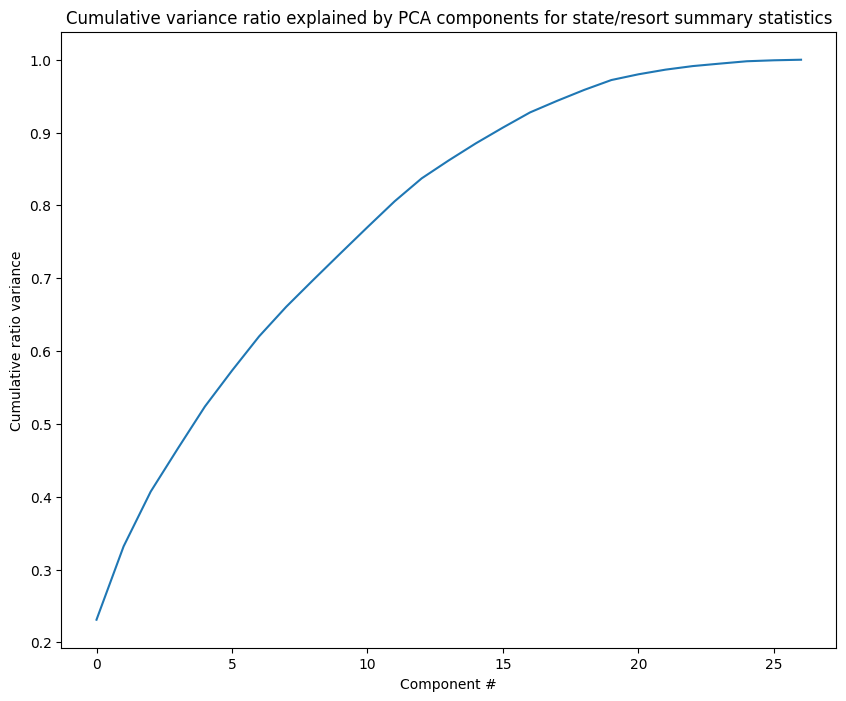

In [16]:
plt.subplots(figsize=(10, 8))
plt.plot(df_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

In [17]:
df_pca_x = df_pca.transform(df_feat_scaled)

df_pca_x.shape

(4424, 27)

Text(0.5, 1.0, 'Ski states summary PCA, 33.2% variance explained')

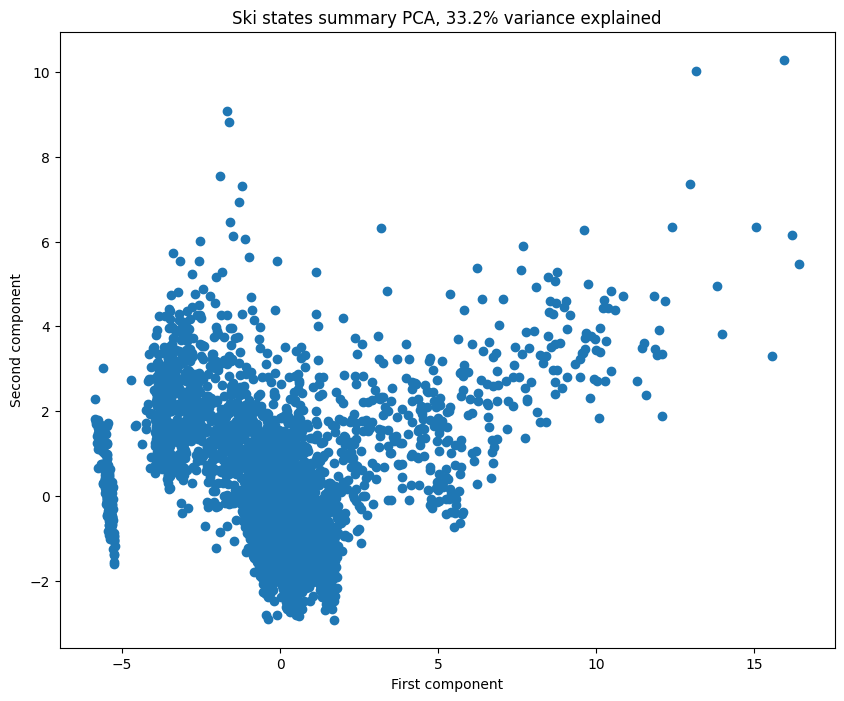

In [18]:
x = df_pca_x[:, 0]
y = df_pca_x[:, 1]
df_things = df.index
# state = state_summary_index
pc_var = 100 * df_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
# for s, x, y in zip(df_things, x, y):
#     plt.annotate(s, (x, y))

From this graph we can surmise that it would be difficult to make any assumptions based only on two components, as they account for only 33% of variance. This would be expected from the cumulative variance ratio plot before this one, where we can see that we need around 10 components to explain just 75% of the variance.

In [19]:
pca_df = pd.DataFrame({'PC1':df_pca_x[:,0], 'PC2':df_pca_x[:,1]}, index=df_things)
pca_df.head()

,PC1,PC2
0,-5.498943,0.394622
1,-0.197047,-0.764703
2,-3.932040,1.912164
3,0.365943,-1.103986
4,0.229291,0.521497


In [20]:
pca_df = pd.concat([pca_df, df.Target], axis=1)
pca_df.head()

,PC1,PC2,Target
0,-5.498943,0.394622,Dropout
1,-0.197047,-0.764703,Graduate
2,-3.932040,1.912164,Dropout
3,0.365943,-1.103986,Graduate
4,0.229291,0.521497,Graduate


In [21]:
# test_df = df.Target
# test_df.replace({'Dropout': 1, 'Graduate':10, 'Enrolled':100}, inplace=True)
# pca_df['Target'] = test_df

# pca_df.Target

In [22]:
# pca_df['Threetile'] = pd.qcut(pca_df.Target, q=3, labels=['dropout', 'graduate', 'enrolled'])
# pca_df.head()

In [23]:
# x = pca_df.PC1
# y = pca_df.PC2
# price = pca_df.Target
# quartiles = pca_df.Threetile
# state = pca_df.index
# pc_var = 100 * df_pca.explained_variance_ratio_.cumsum()[1]
# fig, ax = plt.subplots(figsize=(10,8))
# for q in quartiles.cat.categories:
#     im = quartiles == q
#     ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
# ax.set_xlabel('First component')
# ax.set_ylabel('Second component')
# plt.legend()
# ax.set_title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
# # for s, x, y in zip(state, x, y):
# #     plt.annotate(s, (x, y))

In [24]:
df_1 = df.copy()
df_1.replace({'Dropout': 0, 'Graduate':1, 'Enrolled':2}, inplace=True)
# test_df.replace({'Dropout': 1, 'Graduate':10, 'Enrolled':100}, inplace=True)
# df_1['Target'] = test_df

/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_29270/3569411588.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1.replace({'Dropout': 0, 'Graduate':1, 'Enrolled':2}, inplace=True)


/Users/bencetakacs/Desktop/DSC/DataScienceGuidedCapstone/.venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

/Users/bencetakacs/Desktop/DSC/DataScienceGuidedCapstone/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/bencetakacs/Desktop/DSC/DataScienceGuidedCapstone/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


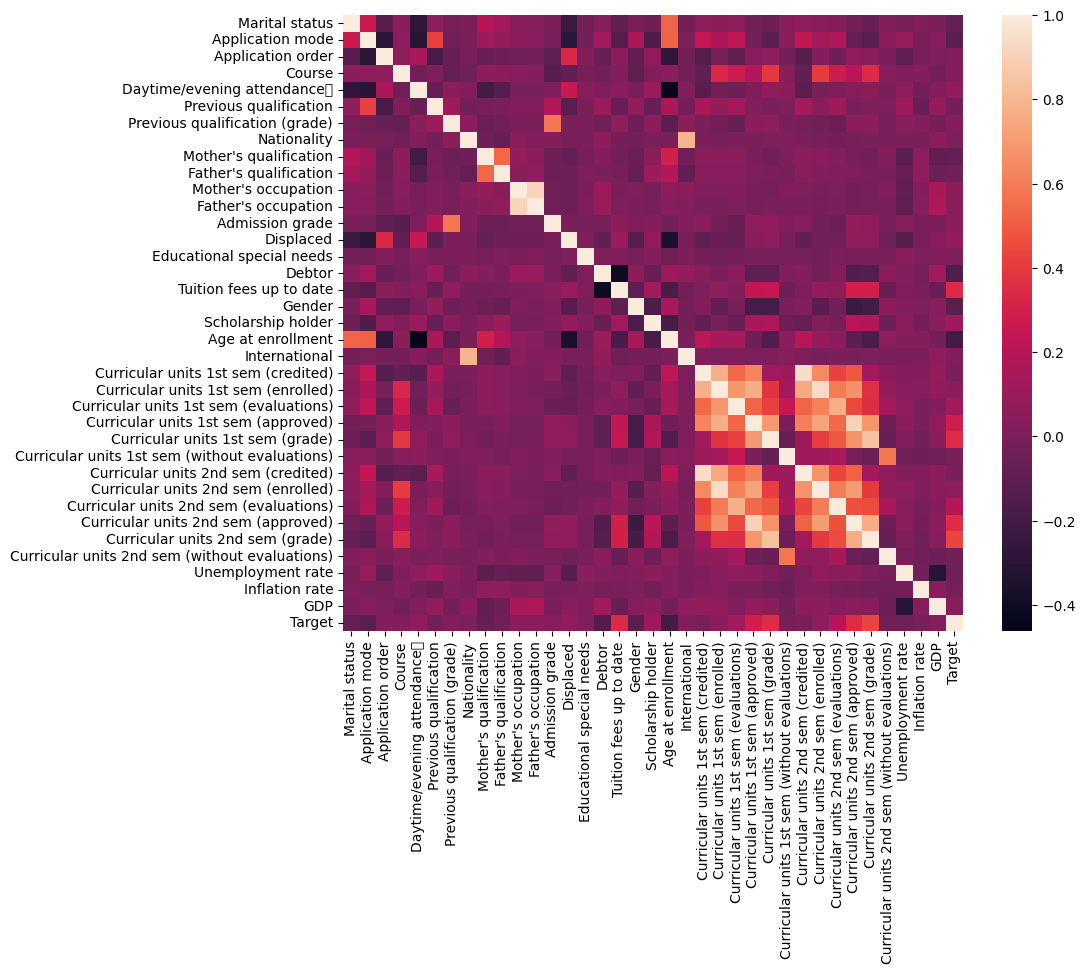

In [25]:
plt.subplots(figsize=(10,8))
sns.heatmap(df_1.corr())

Some obvious correlations we see her are between the numbers of curricular units. Looking outside of this, we see high correlations between our traget and tuition fees up to date, curricular units grade. There's also an interesting correlation between father's and mother's occupation.
We can see the effects of age by looking at the correlation between age at enrollment and daytime/nighttime attendance, marital status. An interesting negative correlation appears between the age at enrollment and the target data.

## __Summary__

Some important features to look at for modeling will be admission grade, gender, and scholarship holder, for example. Although many more test could be run on, for example, parental occupation. I avoided testing on the unemployment rate, inflation rate, and GDP features because these are poorly understood, and as such would not be very useful in an analysis.